# Project 2: Random or not so random

### Task 1

In [269]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pylab as plt

In [50]:
# generate a vector of random numbers which obeys the given distribution.
#
# n: length of the vector
# mu: mean value
# sigma: standard deviation.
# dist: choices for the distribution, you need to implement at least normal 
#       distribution and uniform distribution.
#
# For normal distribution, you can use ``numpy.random.normal`` to generate.
# For uniform distribution, the interval to sample will be [mu - sigma/sqrt(3), mu + sigma/sqrt(3)].

def generate_random_numbers(n, mu, sigma, dist="normal"):
    # write your code here.
    if dist == "normal":
        return np.random.normal(mu, sigma, n)
    elif dist == "uniform":
        return np.random.uniform(mu - sigma/np.sqrt(3),mu + sigma/np.sqrt(3),n)
    else:
        raise Exception("The distribution {unknown_dist} is not implemented".format(unknown_dist=dist))
        
        
# test your code:
y_test = generate_random_numbers(5, 0, 0.1, "normal")
y_test

array([-0.00545259,  0.06845367,  0.00297258,  0.04495037, -0.0802174 ])

In [24]:
y1 = generate_random_numbers(105, 0.5, 1.0, "normal")
y2 = generate_random_numbers(105, 0.5, 1.0, "uniform")

In [ ]:
    x = x0                                  # select the starting point
    p = -grad_objective_func(x)             # find descent direction
    i = 1                                   # starting counter for iteration
    while norm(p) > 1e-9:                   # if the norm is not small
        x = x + 1e-3 * p                    # locate the next iterate
        p = -grad_objective_func(x)         # find next descent direction
        i += 1
    print(i,"Iteration")
    return x

In [141]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task1(y): # repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=True)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n)
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
    return x, f
        
# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task1(y): # no repeat
    x = 0
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    # implement the algorithm's iteration of IGD. Your result should return the the final xk
    # at the last iteration and also the history of objective function at each xk.
    f = np.empty(n)
    for k in range(n):
        gamma = 1/(k+1)
        x = x - gamma*(x - y[ordering[k]])
        f[k] = 0.5*np.sum((x - y)**2)
    return x, f

Final x using placement: 0.45179237054681737
Final x without using placement: 0.5625113802565652


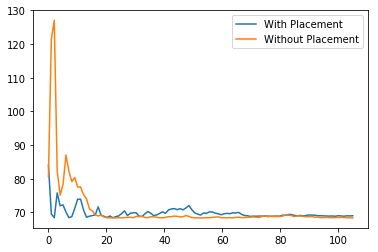

In [142]:
x_wr, wr_solu = IGD_wr_task1(y1)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wo_task1(y1)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.show()

Final x using placement: 0.56689626137151
Final x without using placement: 0.5263465049814209


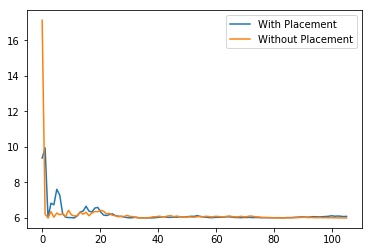

In [138]:
x_wr, wr_solu = IGD_wr_task1(y2)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wo_task1(y2)
print("Final x without using placement:", x_wo)

X = np.linspace(0,105,105)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.show()

### Task 2

In [181]:
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task2(y, beta):
    x = 0
    n = len(beta)
    ordering = np.random.choice(n, n, replace=True)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task2(y, beta):
    n = len(y)
    ordering = np.random.choice(n, n, replace=False)
    f = np.empty(n)
    gamma = 0.05*np.amin(1/beta)
    for k in range(n):
        x = x - gamma*beta[ordering[k]]*(x - y)
        f[k] = 0.5*np.sum(beta*(x - y)**2)
    return x, f

Final x using placement: 2.7241339843419468
Final x without using placement: 2.7417775793568295


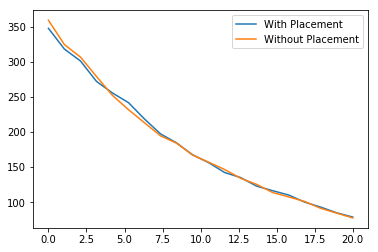

In [198]:
N = 20
beta = np.random.uniform(1,2,N)
y = 5
x_wr, wr_solu = IGD_wr_task2(y, beta)
print("Final x using placement:", x_wr)
x_wo, wo_solu = IGD_wr_task2(y, beta)
print("Final x without using placement:", x_wo)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.show()

### Task 3

In [276]:
# In these two functions, we could only focus on the first n steps and try to make comparisons on these data only.
# In practice, it requires more iterations to converge, due to the matrix might not be easy to deal with.
# You can put the ordering loop into a naive loop: namely, we simply perform the IGD code several rounds.
#
#
#
# IGD, the ordering is permitted to have replacement. 
#
#
def IGD_wr_task3(y, A, xstar):
    n = A.shape[1]
    x = np.zeros(n)
    ordering = np.random.choice(n, n, replace=True)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for k in range(n):
        x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
        f[k] = np.sum((A@x - y)**2)
        conv[k] = LA.norm(x - xstar)
    return x, f, conv 

# IGD, the ordering is not permitted to have replacement.
#
#
def IGD_wo_task3(y, A, xstar):
    n = A.shape[1]
    x = np.zeros(n)
    ordering = np.random.choice(n, n, replace=False)
    f = np.empty(n)
    conv = np.empty(n)
    gamma = 1e-3
    for k in range(n):
        x = x - gamma*A[ordering[k]]*(A[ordering[k]]@x - y[ordering[k]])
        f[k] = np.sum((A@x - y)**2)
        conv[k] = LA.norm(x - xstar)
    return x, f, conv

In [277]:
# generation of exact solution and data y and matrix A.

def generate_problem_task3(m, n, rho):
    A = np.random.normal(0., 1.0, (m, n))
    x = np.random.random(n) # uniform in (0,1)
    w = np.random.normal(0., rho, m)
    y = A@x + w
    return A, x, y

# We generate the problem with 200x100 matrix. rho as 0.01.
#
A, xstar, y = generate_problem_task3(200, 100, 0.01)

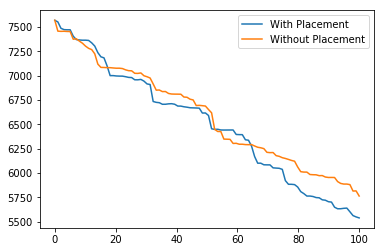

In [284]:
N = A.shape[1]
x_wr, wr_solu, wr_conv = IGD_wr_task3(y, A, xstar)
x_wo, wo_solu, wo_conv = IGD_wo_task3(y, A, xstar)

X = np.linspace(0,N,N)
plt.plot(X,wr_solu)
plt.plot(X,wo_solu)
plt.legend(["With Placement","Without Placement"])
plt.show()

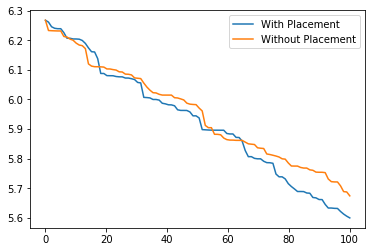

In [285]:
# Histories of norm(xk - xstar) 
X = np.linspace(0,N,N)
plt.plot(X,wr_conv)
plt.plot(X,wo_conv)
plt.legend(["With Placement","Without Placement"])
plt.show()